In [10]:
import kagglehub

kagglehub.login()


In [56]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns




path = kagglehub.dataset_download("sansuthi/plastic-input-into-worlds-oceans")

print(os.listdir(path))

['plastics-top-rivers.csv']


In [39]:
df = pd.read_csv(os.path.join(path, "plastics-top-rivers.csv"))
df

,Entity,Country,sharePlastics
0,Agno,Philippines,0.469647
1,Agusan,Philippines,0.469647
2,Bharathappuzha,India,0.357340
3,Cagayan River,Philippines,0.234824
4,Cagayan de Oro,Philippines,0.265453
5,Chao Phraya,Thailand,0.408389
6,Chenzhen River,China,0.296082
7,Chilyar River,India,0.234824
8,Cilliwung,Indonesia,0.285872
9,Davao River,Philippines,0.265453


In [34]:
df.tail()

,Entity,Country,sharePlastics
45,Ulhas,India,1.327265
46,Wouri River,Cameroon,0.285872
47,Yangon River,Myanmar,0.255243
48,Zapote,Philippines,0.275663
49,Zhujiang,China,0.255243


In [28]:
df.columns

Index(['Entity', 'Country', 'sharePlastics'], dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entity         50 non-null     object 
 1   Country        50 non-null     object 
 2   sharePlastics  50 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


checked for missing values


In [26]:
df.isnull().sum()

Entity           0
Country          0
sharePlastics    0
dtype: int64

checked for duplicates

In [52]:
df.duplicated(subset=['Entity']).sum()

np.int64(0)

found an typo in one of the countries names Myanmar

In [79]:
df['Country'] = df['Country'].replace('Myamnar', 'Myanmar')
df['Country'].value_counts()

Country
Philippines           19
India                  9
Malaysia               5
China                  3
Myanmar                2
Cameroon               2
Thailand               1
Indonesia              1
Bangladesh             1
Cote d'Ivoire          1
Nigeria                1
Sri Lanka              1
Tanzania               1
Dominican Republic     1
Brazil                 1
Vietnam                1
Name: count, dtype: int64

Code to make sure there isnt any weird white spaces that arent supposed to be there

In [82]:
df['Entity'] = df['Entity'].str.strip()
df['Country'] = df['Country'].str.strip()
df['Country'].unique()


array(['Philippines', 'India', 'Thailand', 'China', 'Indonesia',
       'Cameroon', "Cote d'Ivoire", 'Bangladesh', 'Sri Lanka', 'Malaysia',
       'Nigeria', 'Tanzania', 'Myanmar', 'Dominican Republic', 'Brazil',
       'Vietnam'], dtype=object)

In [40]:
df.head()

,Entity,Country,sharePlastics
0,Agno,Philippines,0.469647
1,Agusan,Philippines,0.469647
2,Bharathappuzha,India,0.357340
3,Cagayan River,Philippines,0.234824
4,Cagayan de Oro,Philippines,0.265453


made the decimal percentage a bit more managable and easier to process

In [43]:
df['sharePlastics'] = df['sharePlastics'].round(2)
df.head()

,Entity,Country,sharePlastics
0,Agno,Philippines,0.47
1,Agusan,Philippines,0.47
2,Bharathappuzha,India,0.36
3,Cagayan River,Philippines,0.24
4,Cagayan de Oro,Philippines,0.27


In [46]:
df.head()

,Entity,Country,sharePlastics
0,Agno,Philippines,0.47
1,Agusan,Philippines,0.47
2,Bharathappuzha,India,0.36
3,Cagayan River,Philippines,0.24
4,Cagayan de Oro,Philippines,0.27


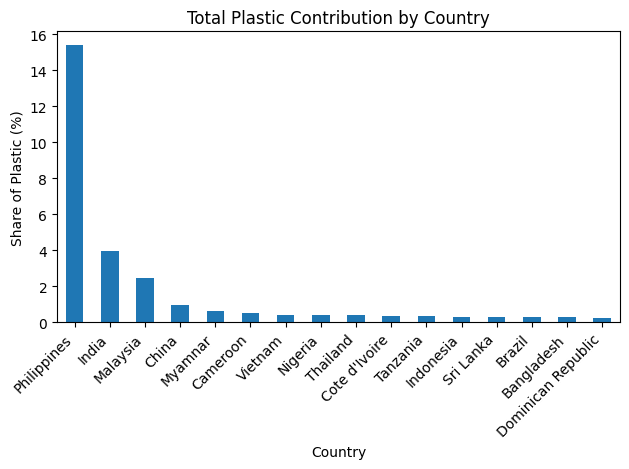

In [49]:
country_totals = df.groupby('Country')['sharePlastics'].sum().sort_values(ascending=False)
country_totals.plot(kind='bar')
plt.title('Total Plastic Contribution by Country')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Share of Plastic (%)')
plt.tight_layout()
plt.show()

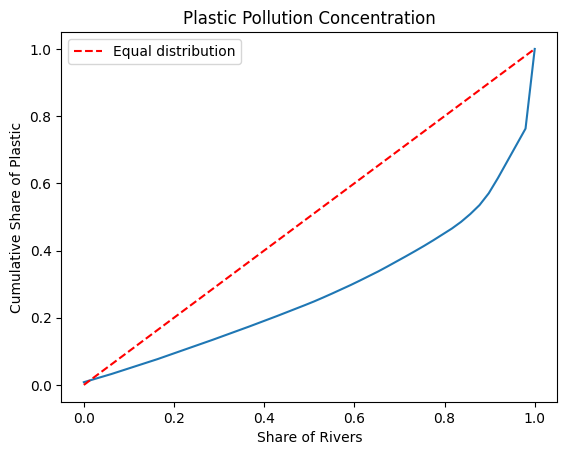

In [55]:
sorted_vals = df['sharePlastics'].sort_values()
cumulative = sorted_vals.cumsum() / sorted_vals.sum()
plt.plot(np.linspace(0, 1, len(cumulative)), cumulative.values)
plt.plot([0,1], [0,1], 'r--', label='Equal distribution')
plt.title('Plastic Pollution Concentration')
plt.xlabel('Share of Rivers')
plt.ylabel('Cumulative Share of Plastic')
plt.legend()
plt.show()

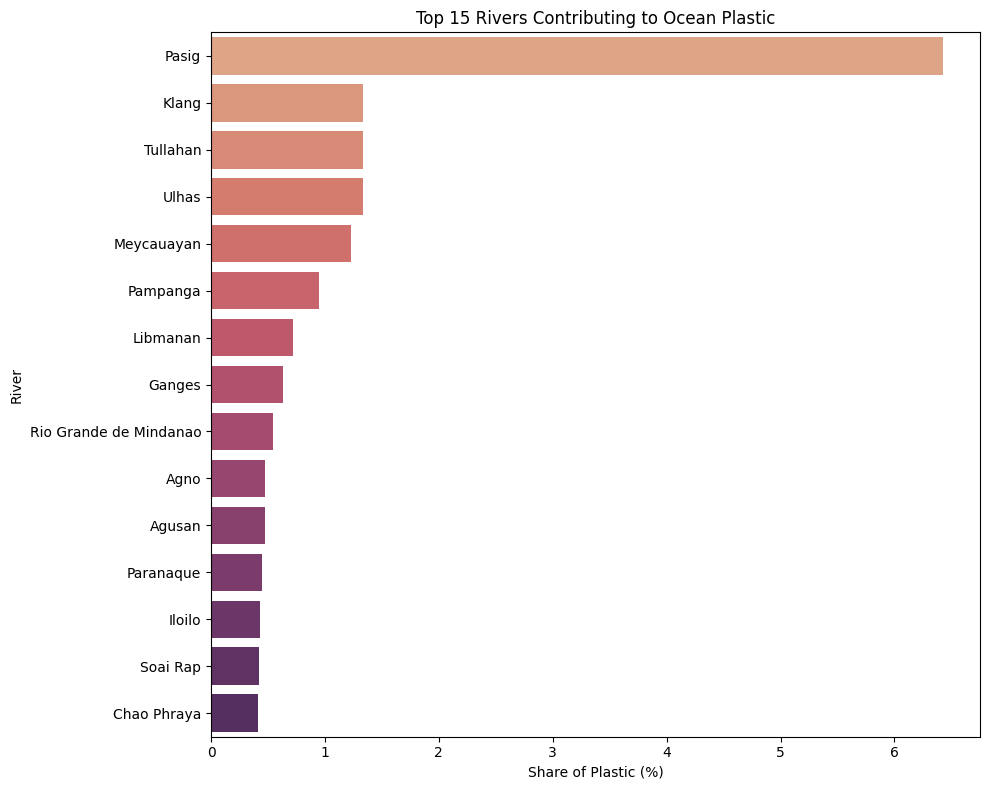

In [75]:
df_sorted = df.sort_values('sharePlastics', ascending=False).head(15)
plt.figure(figsize=(10, 8))
sns.barplot(data=df_sorted, x='sharePlastics', y='Entity', hue='Entity', palette='flare', legend=False)
plt.title('Top 15 Rivers Contributing to Ocean Plastic')
plt.xlabel('Share of Plastic (%)')
plt.ylabel('River')
plt.tight_layout()
plt.show()

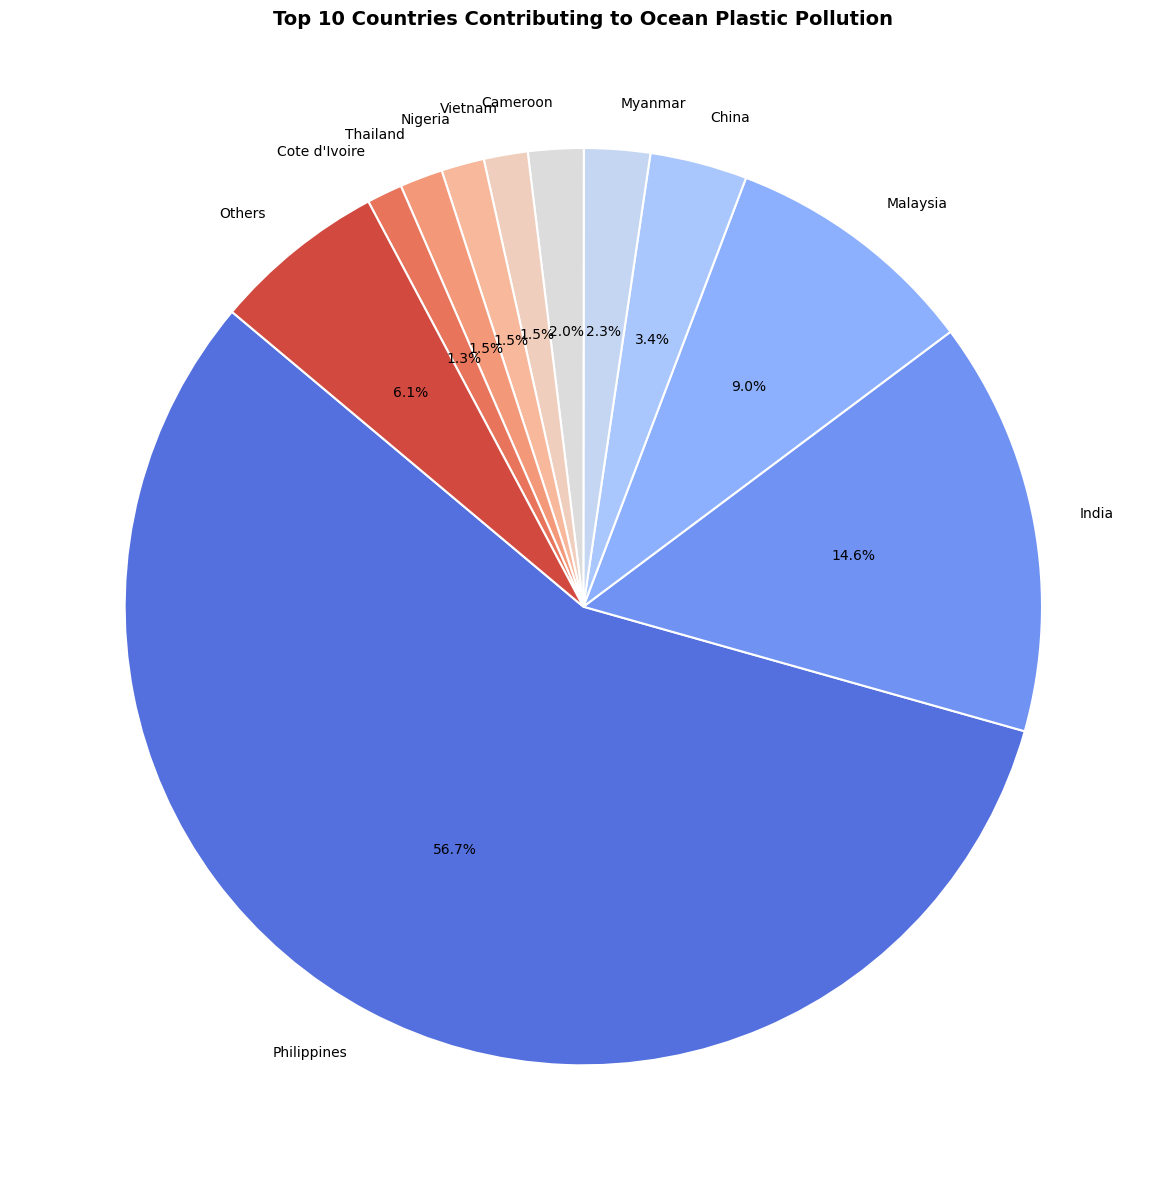

In [84]:
country_totals = df.groupby('Country')['sharePlastics'].sum().reset_index()
country_totals = country_totals.sort_values('sharePlastics', ascending=False)

top10 = country_totals.head(10)
others_sum = country_totals.iloc[10:]['sharePlastics'].sum()
others = pd.DataFrame({'Country': ['Others'], 'sharePlastics': [others_sum]})

pie_data = pd.concat([top10, others], ignore_index=True)

plt.figure(figsize=(12, 12))
plt.pie(
    pie_data['sharePlastics'],
    labels=pie_data['Country'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('coolwarm', len(pie_data)),
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
    textprops={'fontsize': 10}
)
plt.title('Top 10 Countries Contributing to Ocean Plastic Pollution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [77]:
df['Country'].unique()

array(['Philippines', 'India', 'Thailand', 'China', 'Indonesia',
       'Cameroon', "Cote d'Ivoire", 'Bangladesh', 'Sri Lanka', 'Malaysia',
       'Nigeria', 'Tanzania', 'Myamnar', 'Dominican Republic', 'Brazil',
       'Vietnam'], dtype=object)